In [1]:
#importing necessary libraries
# Working with data
import pandas as pd
import numpy as np
# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#import the dataset
data=pd.read_csv('salarydata.csv')

In [3]:
# Check the first five rows of the dataset
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Check the observations and features of the dataset
data.shape

(32561, 14)

In [5]:
#Check the basic details of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


### Handling missing values

In [7]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [8]:
# replace the question mark in the dataset

In [9]:
data = data.replace('?', np.nan)

In [10]:
data.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [11]:
#replace the missing values with mode.

In [12]:
data['workclass'].fillna(data['workclass'].mode()[0],inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0],inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0],inplace=True)

In [13]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### Correlation Matrix

<AxesSubplot:>

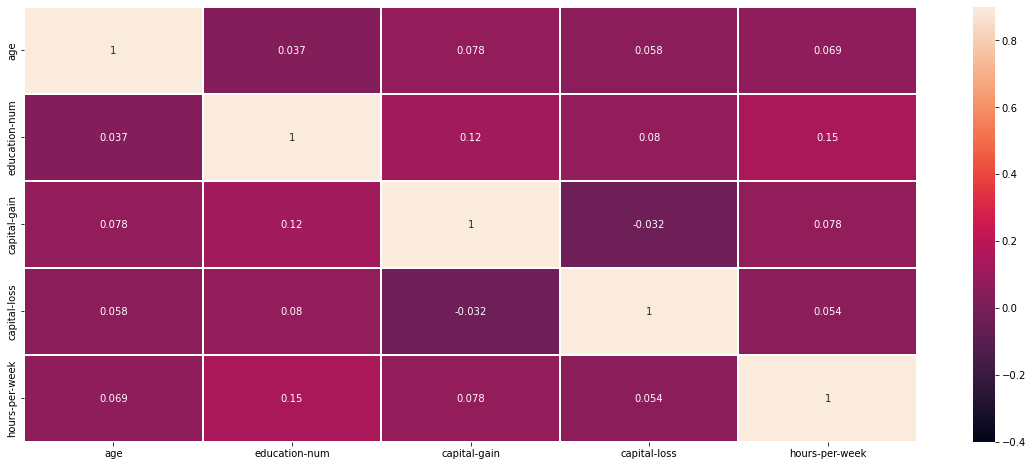

In [14]:
corrmatrix = data.corr()
plt.subplots(figsize =(20,8))
sns.heatmap(corrmatrix, vmin =-.4,vmax=0.9,annot =True ,linewidth =.2)

In [15]:
# Drop the unnecessary columns

In [16]:
data.drop(['education-num','relationship','race','capital-gain','capital-loss','native-country'],axis=1, inplace=True)

## Exploratory Data Analysis

### Univariate Analysis

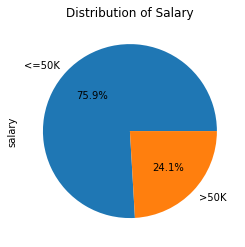

In [17]:
data['salary'].value_counts().plot.pie(autopct='%.1f%%')
plt.title("Distribution of Salary")
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

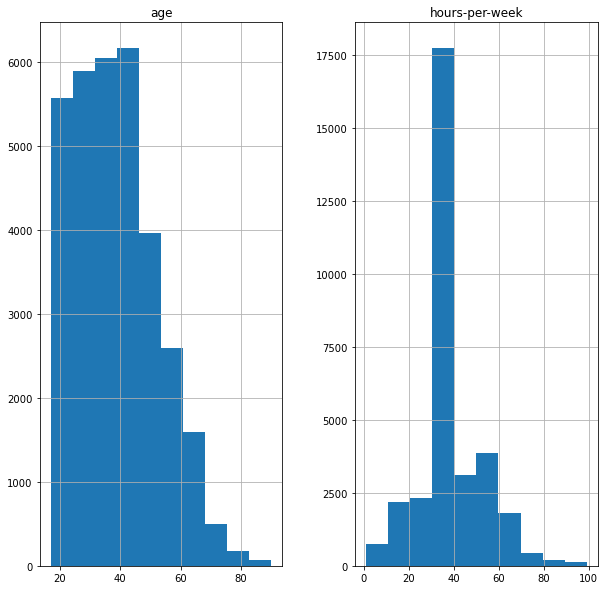

In [18]:
rcParams['figure.figsize'] = 10,10
data[['age','hours-per-week']].hist()

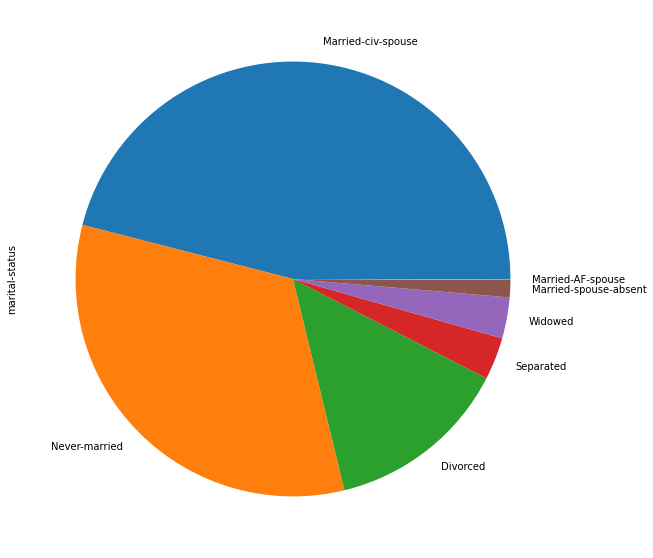

In [19]:
#pie chart showing the marital status
data['marital-status'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']=(7,7)
plt.show()

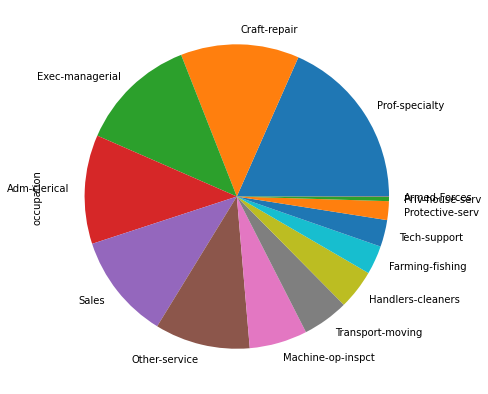

In [20]:
data['occupation'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']=(7,7)
plt.show()

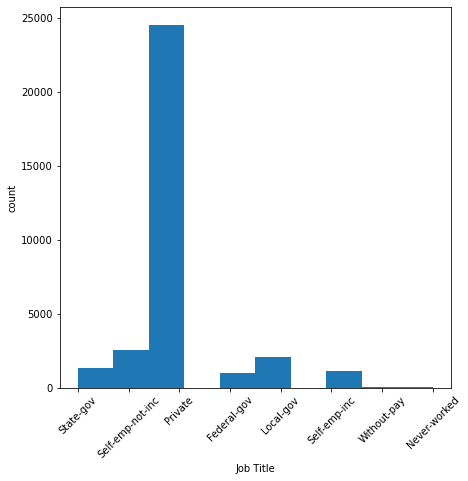

In [21]:
plt.hist(data['workclass'])
plt.xlabel("Job Title")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

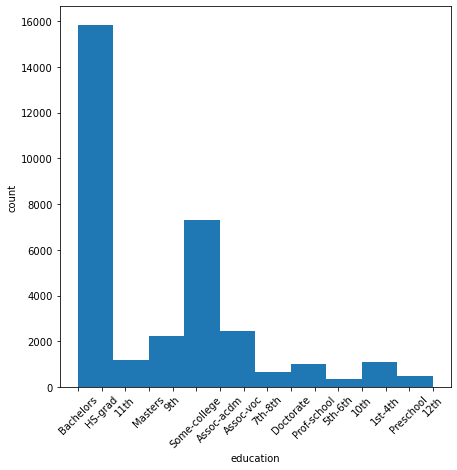

In [22]:
plt.hist(data['education'])
plt.xlabel("education")
plt.ylabel("count")
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis

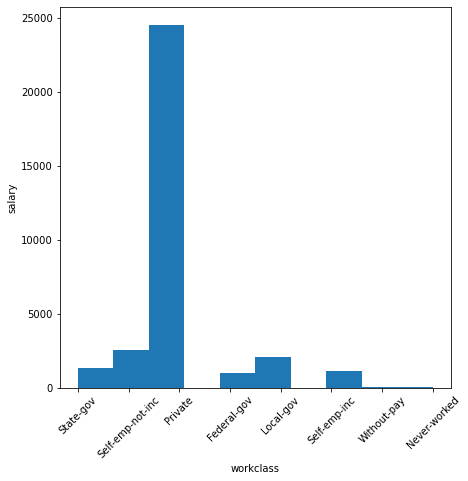

In [23]:
plt.hist(data['workclass'])
plt.xlabel("workclass")
plt.ylabel("salary")
plt.xticks(rotation=45)
plt.show()

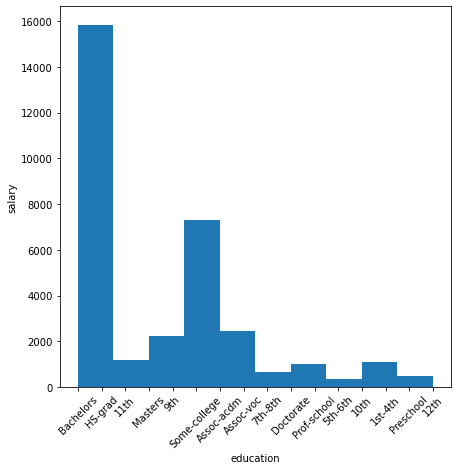

In [24]:
plt.hist(data['education'])
plt.xlabel("education")
plt.ylabel("salary")
plt.xticks(rotation=45)
plt.show()

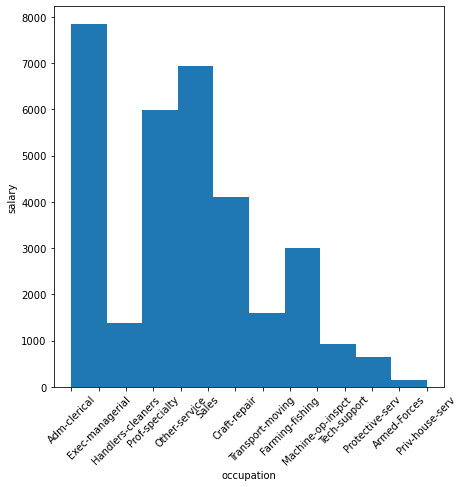

In [25]:
plt.hist(data['occupation'])
plt.xlabel("occupation")
plt.ylabel("salary")
plt.xticks(rotation=45)
plt.show()

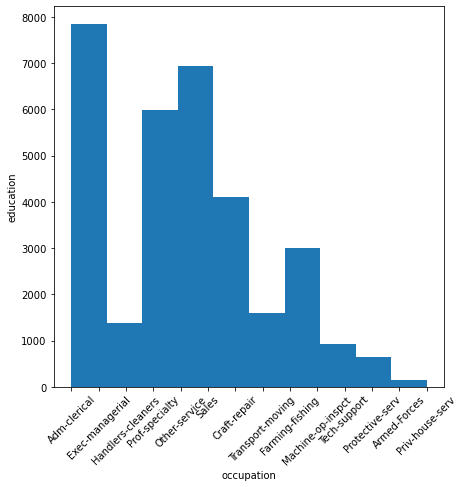

In [26]:
plt.hist(data['occupation'])
plt.xlabel("occupation")
plt.ylabel("education")
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

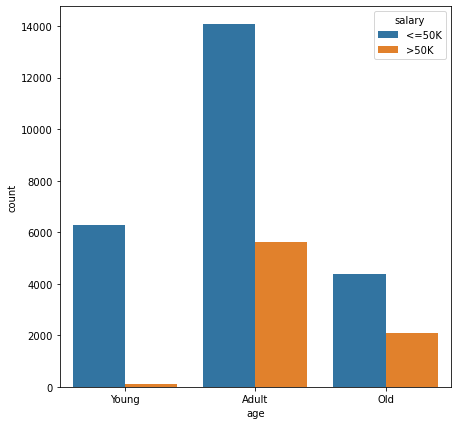

In [27]:
data['age'] = pd.cut(data['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old']) 
sns.countplot(x = 'age', hue = 'salary', data = data)

<AxesSubplot:xlabel='workclass', ylabel='count'>

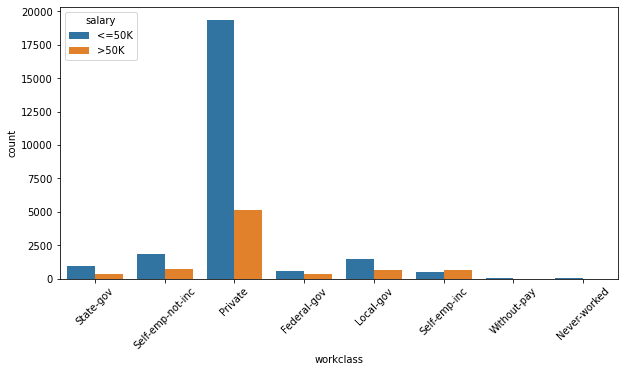

In [28]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.countplot(x = 'workclass', hue = 'salary', data = data)

In [29]:
data['hours-per-week'] = pd.cut(data['hours-per-week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

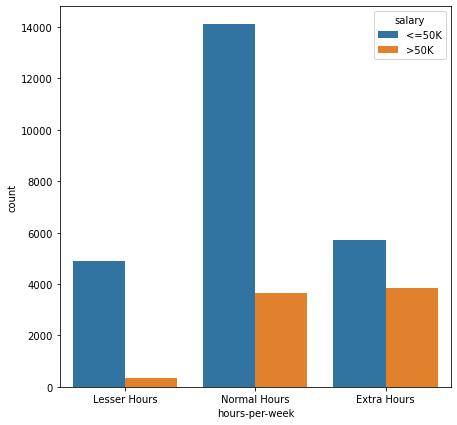

In [30]:
sns.countplot(x = 'hours-per-week', hue = 'salary', data = data)

<AxesSubplot:xlabel='sex', ylabel='count'>

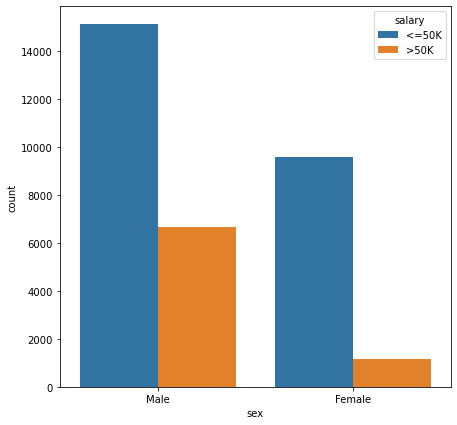

In [31]:
sns.countplot(x = 'sex', hue = 'salary', data = data)

In [32]:
# scatterplot
colors = ['red', 'blue']
salary = ['<=50K','>50K']

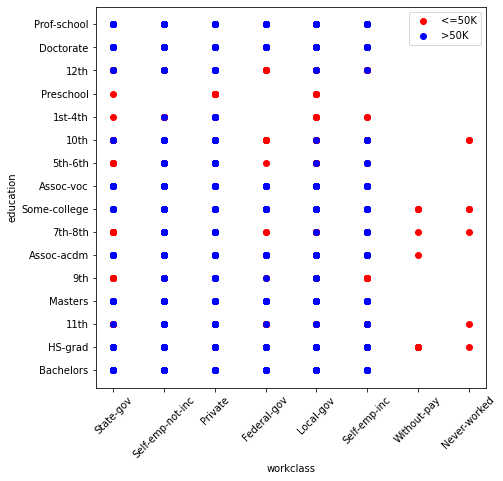

In [33]:
for i in range(2):
    x = data[data['salary'] == salary[i]]
    plt.scatter(x['workclass'], x['education'], c = colors[i], label=salary[i])
plt.xlabel("workclass")
plt.xticks(rotation=45)
plt.ylabel("education")
plt.legend()

Here we change some of the columns in to categorical data for visualization.Therefore again we have to load the dataset for doing model building

In [34]:
#import the dataset
data=pd.read_csv('salarydata.csv')

In [35]:
data = data.replace('?', np.nan)

In [36]:
data.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [37]:
data['workclass'].fillna(data['workclass'].mode()[0],inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0],inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0],inplace=True)

In [38]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [39]:
# Drop the unnecessary columns
data.drop(['education-num','relationship','race','capital-gain','capital-loss','native-country'],axis=1, inplace=True)
data

,age,workclass,education,marital-status,occupation,sex,hours-per-week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,40,<=50K
...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Female,38,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Male,40,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Female,40,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Male,20,<=50K


## Outlier Handling

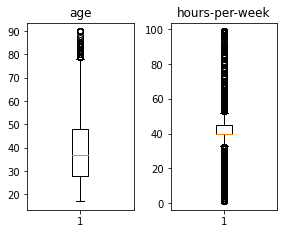

In [40]:
num_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(10,10,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

In [41]:
for i in num_col:
    Q1=data[i].quantile(0.25) # 25th quantile
    Q3=data[i].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[i] = np.clip(data[i], Lower_Whisker, Upper_Whisker) 

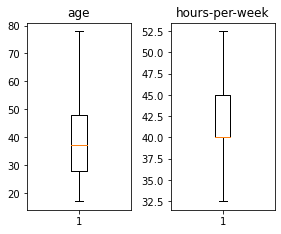

In [42]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(10,10,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

## Encoding
### Label Encoding

In [43]:
# importing Libraries for label encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()

In [45]:
#encoding categorical features of dataset

In [46]:
cat_cols=data.drop(['age','hours-per-week'],axis=1)
cat_cols.head()

,workclass,education,marital-status,occupation,sex,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Male,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Male,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,<=50K


In [47]:
for i in cat_cols:
    cat_cols[i]=le.fit_transform(cat_cols[i])
    print(le.classes_)
cat_cols.head()

['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
['Female' 'Male']
['<=50K' '>50K']


,workclass,education,marital-status,occupation,sex,salary
0,6,9,4,0,1,0
1,5,9,2,3,1,0
2,3,11,0,5,1,0
3,3,1,2,5,1,0
4,3,9,2,9,0,0


In [48]:
num_cols=data.drop(['workclass','education','marital-status','occupation','sex','salary'],axis=1)
num_cols.head()

,age,hours-per-week
0,39.0,40.0
1,50.0,32.5
2,38.0,40.0
3,53.0,40.0
4,28.0,40.0


In [49]:
#concatenating encoded data to original data
data=pd.concat([num_cols,cat_cols],axis=1)
data.head()

,age,hours-per-week,workclass,education,marital-status,occupation,sex,salary
0,39.0,40.0,6,9,4,0,1,0
1,50.0,32.5,5,9,2,3,1,0
2,38.0,40.0,3,11,0,5,1,0
3,53.0,40.0,3,1,2,5,1,0
4,28.0,40.0,3,9,2,9,0,0


## Model Training

In [50]:
# Seperating the data into dependent and independent variables. Here we take Species as target or dependent variable.

In [51]:
X=data.drop('salary',axis=1)
y=data['salary']

In [52]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 1. Logistic Regression

In [53]:
#importing the libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [54]:
# Instantiate learning model
log_reg=LogisticRegression()

In [55]:
# Fitting the model
log_reg_model=log_reg.fit(X_train,y_train)
# Predicting the Test set results
log_reg_pred=log_reg_model.predict(X_test)

In [56]:
#Evaluating Predictions
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,log_reg_pred))
print('precision:',precision_score(y_test,log_reg_pred))
print('recall:',recall_score(y_test,log_reg_pred))
print("f1_score:",f1_score(y_test,log_reg_pred))

accuracy: 0.7653922923384001
precision: 0.5333333333333333
recall: 0.218968809675366
f1_score: 0.31046931407942235


In [57]:
ac_log = accuracy_score( y_test,log_reg_pred)

In [58]:
# Confusion Matrix
confusion_matrix(y_test,log_reg_pred)

array([[4641,  301],
       [1227,  344]], dtype=int64)

### Model 2-KNN Model

In [59]:
# importing libraries for KNN model
from sklearn.neighbors import KNeighborsClassifier

In [60]:
metric_k=[]
neighbors= range(3,15)

for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier= classifier.fit(X_train,y_train)
    y_pred_kNN= classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

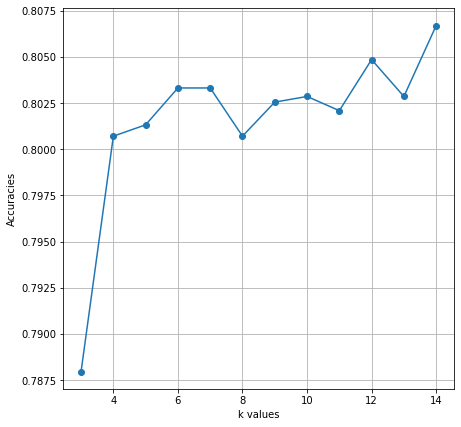

In [61]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [62]:
# Instantiate learning model
classifier= KNeighborsClassifier(n_neighbors=5)
# Fitting the model
classifier= classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred_kNN= classifier.predict(X_test)

In [63]:
#Evaluating Predictions
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred_kNN))
print('precision:',precision_score(y_test,y_pred_kNN))
print('recall:',recall_score(y_test,y_pred_kNN))
print("f1_score:",f1_score(y_test,y_pred_kNN))

accuracy: 0.801320436050975
precision: 0.592271818787475
recall: 0.5658816040738384
f1_score: 0.5787760416666666


In [64]:
ac_knn=accuracy_score(y_test,y_pred_kNN)

In [65]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_kNN)

array([[4330,  612],
       [ 682,  889]], dtype=int64)

### Model 3- Support Vector Machine Model 

In [66]:
# Importing libraries for SVM model

In [67]:
from sklearn.svm import SVC

In [68]:
#SVM with rbf kernel
# Instantiate learning model
svm_clf=SVC(kernel='rbf')
# Fitting the model
svm_clf=svm_clf.fit(X_train,y_train)
# Predicting the Test set results
y_pred_SVM=svm_clf.predict(X_test)

In [69]:
#Evaluating Predictions
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred_SVM))
print('precision:',precision_score(y_test,y_pred_SVM))
print('recall:',recall_score(y_test,y_pred_SVM))
print("f1_score:",f1_score(y_test,y_pred_SVM))

accuracy: 0.7587901120835252
precision: 0.0
recall: 0.0
f1_score: 0.0


In [70]:
ac_svm=accuracy_score(y_test,y_pred_SVM)

In [71]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_SVM)

array([[4942,    0],
       [1571,    0]], dtype=int64)

### Model 4- Decision Tree Classifier

In [72]:
# importing libraries for decision tree classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
# Instantiate learning model
dt_clf=DecisionTreeClassifier()
# Fitting the model
dt_clf=dt_clf.fit(X_train,y_train)
# Predicting the Test set results
y_pred_dt=dt_clf.predict(X_test)

In [75]:
#Evaluating Predictions
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred_dt))
print('precision:',precision_score(y_test,y_pred_dt))
print('recall:',recall_score(y_test,y_pred_dt))
print("f1_score:",f1_score(y_test,y_pred_dt))

accuracy: 0.7776754183939812
precision: 0.5420369104579631
recall: 0.5047740292807129
f1_score: 0.5227422544495715


In [76]:
ac_dt=accuracy_score(y_test,y_pred_dt)

In [77]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_dt)

array([[4272,  670],
       [ 778,  793]], dtype=int64)

### Model 5- Random Forest Algorithm

In [78]:
# importing libraries for random forest algorithm
from sklearn.ensemble import RandomForestClassifier
# Instantiate learning model
rf_clf=RandomForestClassifier()
# Fitting the model
rf_clf=rf_clf.fit(X_train,y_train)
# Predicting the Test set results
y_pred_rf=rf_clf.predict(X_test)

In [79]:
#Evaluating Predictions
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred_rf))
print('precision:',precision_score(y_test,y_pred_rf))
print('recall:',recall_score(y_test,y_pred_rf))
print("f1_score:",f1_score(y_test,y_pred_rf))

accuracy: 0.8183632734530938
precision: 0.641193595342067
recall: 0.5607893061744113
f1_score: 0.5983022071307301


In [80]:
ac_rf=accuracy_score(y_test,y_pred_rf)

In [81]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_rf)

array([[4449,  493],
       [ 690,  881]], dtype=int64)

### Model 6- Extreme Gradient Boosting (XGBoost)

In [82]:
# Install
!pip install xgboost
# Import
import xgboost as xgb

In [83]:
# modeling 
xgboost = xgb.XGBClassifier()
xgboost= xgboost.fit(X_train, y_train)
xgb_pred = xgboost.predict(X_test)

In [84]:
#Evaluating Predictions
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,xgb_pred))
print('precision:',precision_score(y_test,xgb_pred))
print('recall:',recall_score(y_test,xgb_pred))
print("f1_score:",f1_score(y_test,xgb_pred))

accuracy: 0.8407799785045295
precision: 0.6998502994011976
recall: 0.5951623169955442
f1_score: 0.6432748538011696


In [85]:
ac_xgb=accuracy_score(y_test,xgb_pred)

In [86]:
# Confusion Matrix
confusion_matrix(y_test,xgb_pred)

array([[4541,  401],
       [ 636,  935]], dtype=int64)

### Model 7- Gradient Boosting 

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

In [88]:
print('accuracy:',accuracy_score(y_test,gb_pred))
print('precision:',precision_score(y_test,gb_pred))
print('recall:',recall_score(y_test,gb_pred))
print("f1_score:",f1_score(y_test,gb_pred))

accuracy: 0.8441578381698143
precision: 0.7231139646869984
recall: 0.573520050922979
f1_score: 0.6396876109336174


In [89]:
ac_gb=accuracy_score(y_test,gb_pred)

In [90]:
# Confusion Matrix
confusion_matrix(y_test,gb_pred)

array([[4597,  345],
       [ 670,  901]], dtype=int64)

### Model prediction Accuracy table 

In [91]:
from tabulate import tabulate
table = [['Model', 'Accuracy'], ['Logistic Regression',ac_log], ['KNN',ac_knn],['Decision tree',ac_dt],['Random Forest',ac_rf],['SVM',ac_svm],['XG Boost',ac_xgb],['Gradient Booster',ac_gb]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │   0.765392 │
├─────────────────────┼────────────┤
│ KNN                 │   0.80132  │
├─────────────────────┼────────────┤
│ Decision tree       │   0.777675 │
├─────────────────────┼────────────┤
│ Random Forest       │   0.818363 │
├─────────────────────┼────────────┤
│ SVM                 │   0.75879  │
├─────────────────────┼────────────┤
│ XG Boost            │   0.84078  │
├─────────────────────┼────────────┤
│ Gradient Booster    │   0.844158 │
╘═════════════════════╧════════════╛


### Fine Tuning

In [92]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameters, scoring='accuracy',n_jobs=4,cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 100}, 0.8420992899856994)

In [93]:
parameter2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1750, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameter2, scoring='accuracy',n_jobs=4,cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'max_depth': 5}, 0.8423681440176809)

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1750,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8472286196837095
precision: 0.7218798151001541
recall: 0.596435391470401
f1_score: 0.6531892645521088


In [96]:
# save the model
import pickle
filename = 'final.pkl'
pickle.dump(gb, open(filename, 'wb'))